(0.0, 0.2)

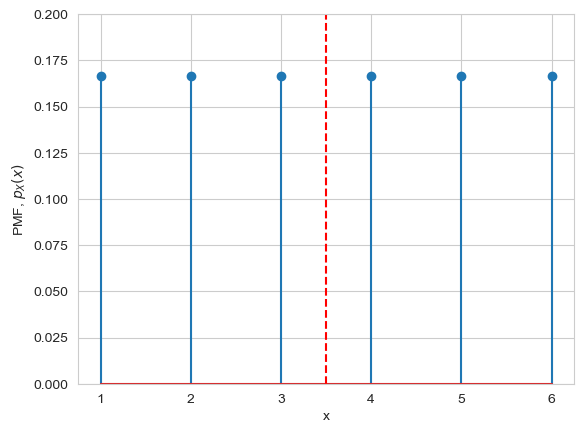

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

a = 1
b = 6

# 生成等差数组
x = np.arange(a, b+1)
# 生成离散均匀分布的随机整数
discrete_uniform = randint(a, b+1)
# 计算随机变量 x 的概率质量函数
p_x = discrete_uniform.pmf(x)

E_x = np.sum(p_x*x)

fig, ax = plt.subplots()

plt.stem(x, p_x)
plt.axvline(x = E_x, color = 'r', linestyle = '--')

plt.xticks(np.arange(a,b+1))
plt.xlabel('x')
plt.ylabel('PMF, $p_X(x)$')
plt.ylim([0,0.2])

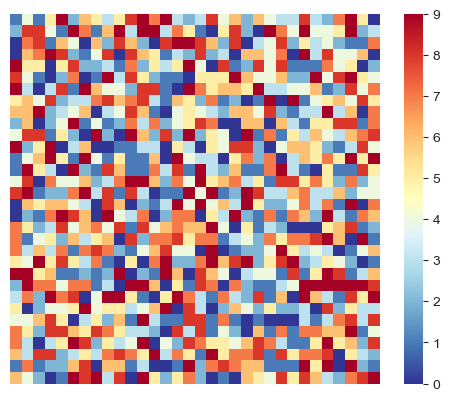

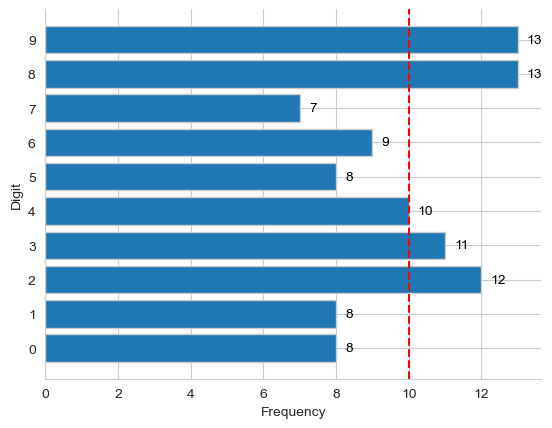

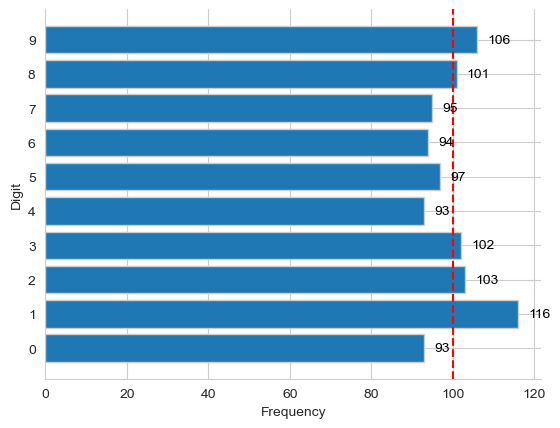

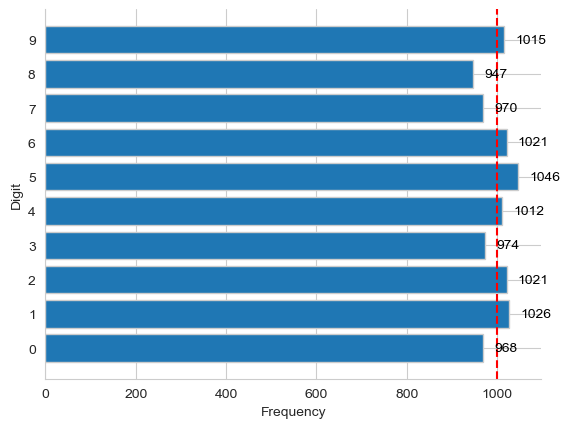

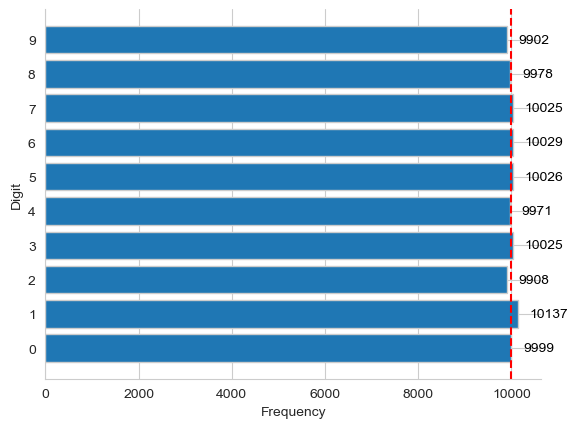

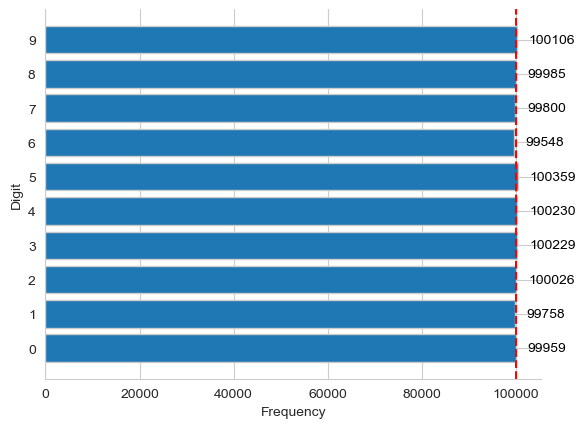

In [2]:
from mpmath import mp
import numpy as np
import matplotlib.pyplot as plt

# 设置精度 mp.dps代表数字的有效位数
mp.dps = 1024 + 1
# 圆周率小数部分
digits = str(mp.pi)[2:]
len(digits)

digits_list = [int(x) for x in digits]

digits_array  = np.array(digits_list)
# 转换为矩阵
digits_matrix = digits_array.reshape((32, 32))

# different color
# distribution at different steps

# make a heatmap
import seaborn as sns

fig, ax = plt.subplots()

ax = sns.heatmap(digits_matrix, vmin=0, vmax=9,
                 cmap="RdYlBu_r", 
                 yticklabels=False,
                 xticklabels=False)

ax.set_aspect("equal")
ax.tick_params(left=False, bottom=False)

num_digits_array = [100,1000,10000,100000,1000000]

for num_digits in num_digits_array:
    
    mp.dps = num_digits + 1
    digits = str(mp.pi)[2:]
    len(digits)
    
    # 生成列表
    digits_list = [int(x) for x in digits]
    
    digits_array  = np.array(digits_list)
    
    fig, ax = plt.subplots()

    # 使用 numpy 的 bincount 函数计算 digits_array 中每个数字出现的次数
    counts = np.bincount(digits_array)
    
    # 使用水平条形图可视化每个数字出现的频率
    ax.barh(range(10), counts, align='center', edgecolor = [0.8,0.8,0.8])
    
    for i, v in enumerate(counts):
        ax.text(v + num_digits/400, i, str(v), color='k', va='center')
    
    ax.axvline(x = num_digits/10, color = 'r', linestyle = '--')
    plt.yticks(range(10))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Digit')

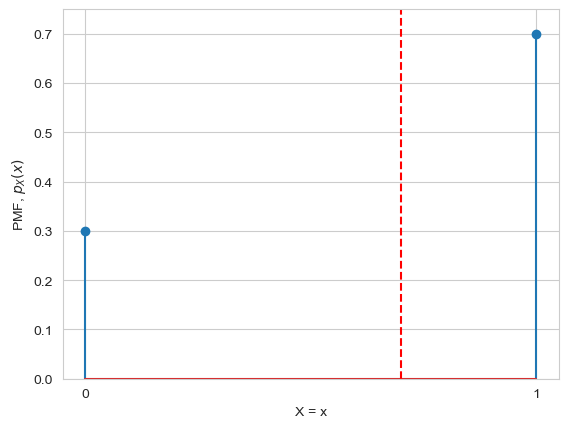

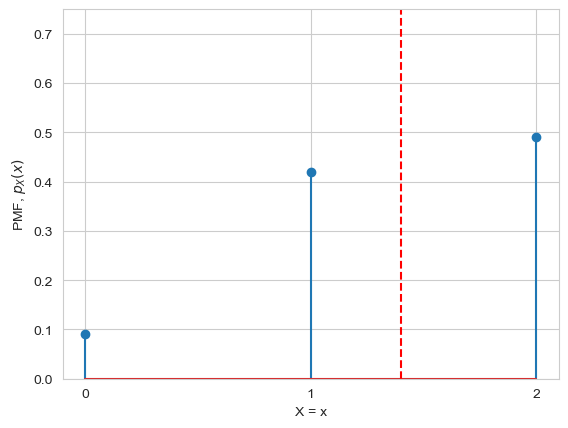

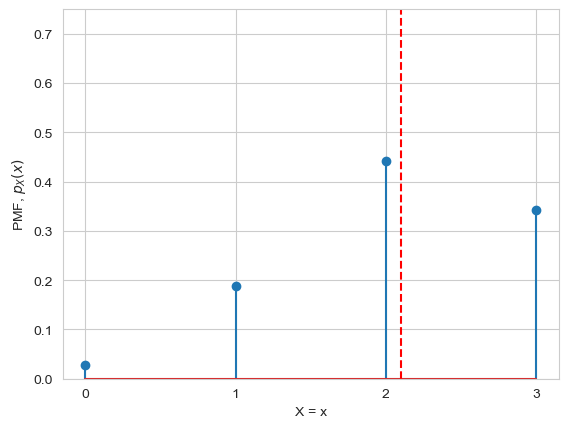

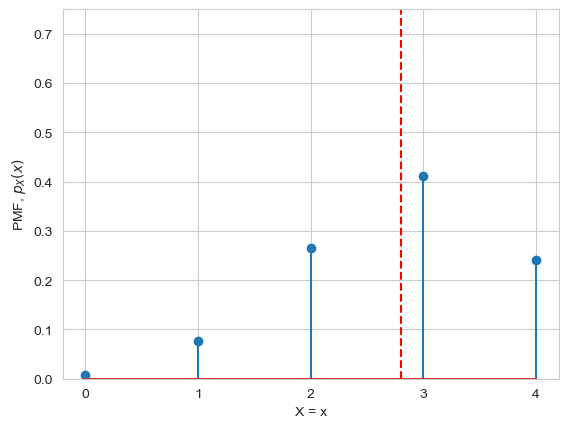

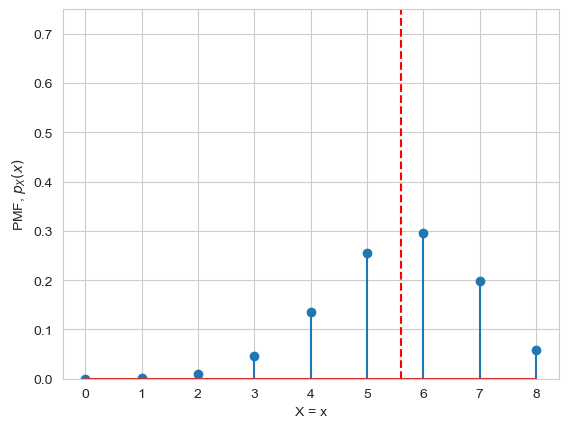

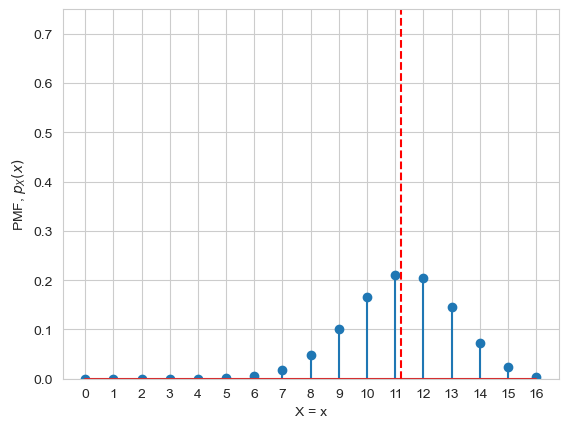

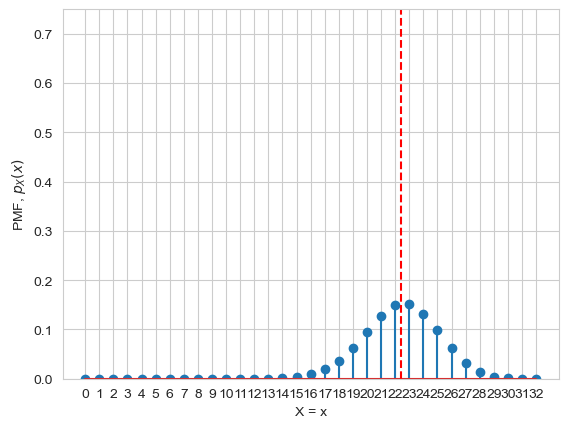

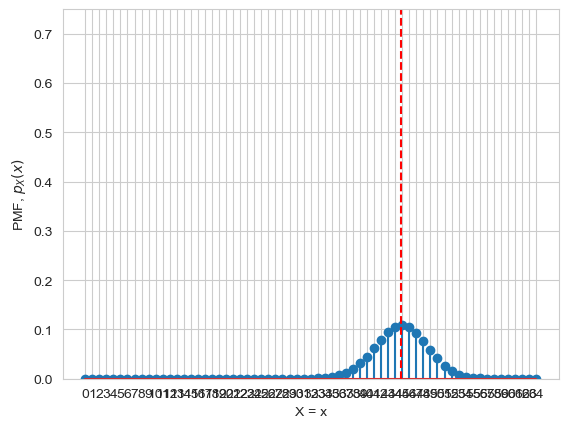

In [3]:
from scipy.stats import binom  # 二项分布
import matplotlib.pyplot as plt
import numpy as np

KK = [1,2,3,4,8,16,32,64]
p = 0.7 # 0.5

for K in KK:
    
    # 生成等差数列
    x = np.arange(0, K + 1)
    
    # 计算二项分布的概率质量函数
    # x 是成功的次数 K 是实验的次数 p 是成功的概率
    p_x= binom.pmf(x, K, p)
    
    # 平均值
    E_x = np.sum(p_x*x)
    
    fig, ax = plt.subplots()
    plt.stem(x, p_x)
    plt.axvline(x = E_x, color = 'r', linestyle = '--')
    
    plt.xticks(np.arange(K+1))
    plt.xlabel('X = x')
    plt.ylabel('PMF, $p_X(x)$')
    plt.ylim([0,p +0.05])

D:\miniconda\lib\site-packages\scipy\stats\_multivariate.py:3220: RuntimeWarning: invalid value encountered in cast
  xx = np.asarray(x, dtype=np.int_)


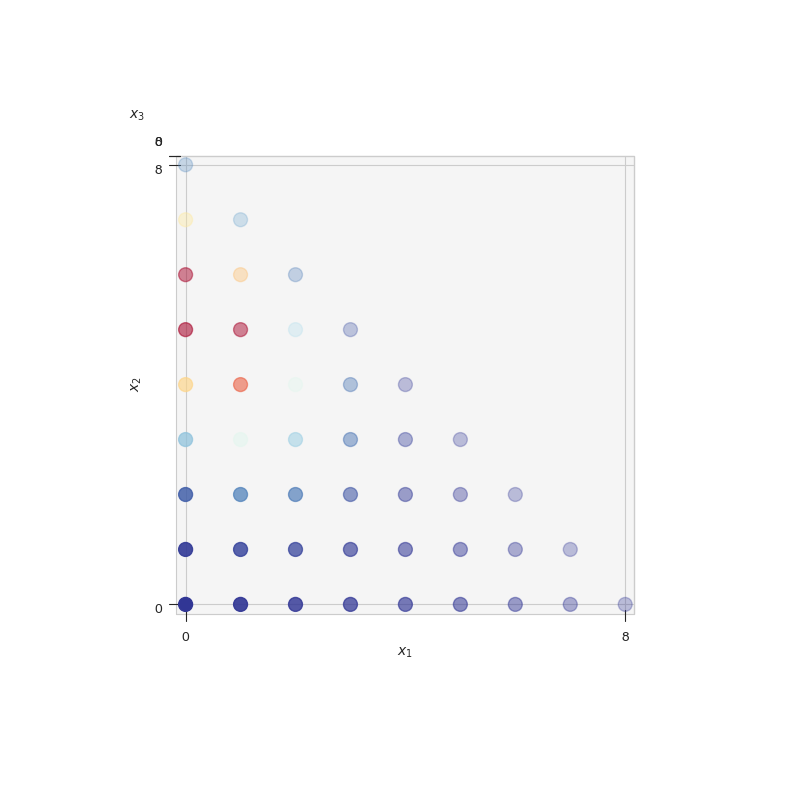

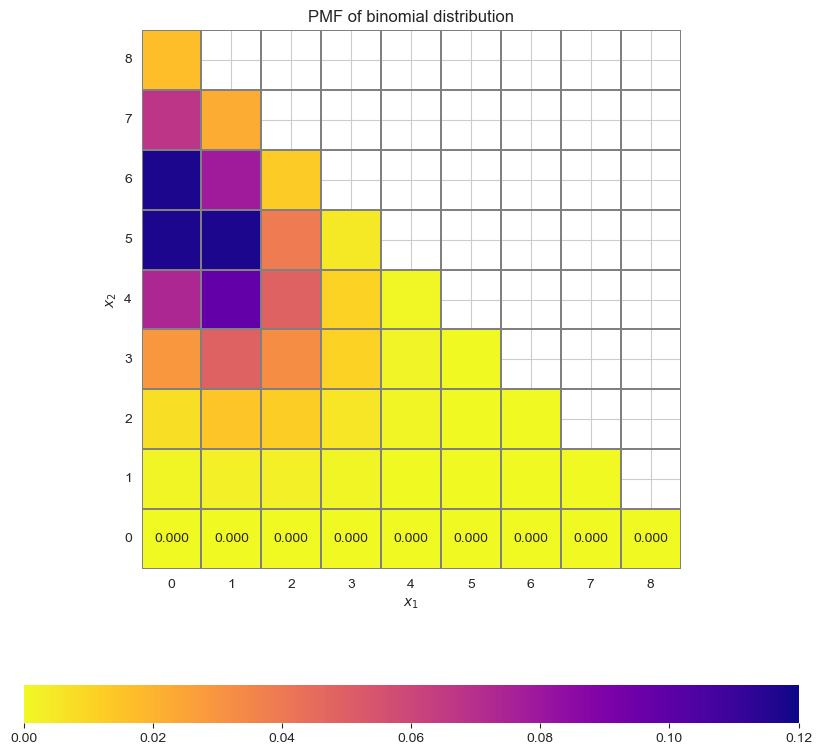

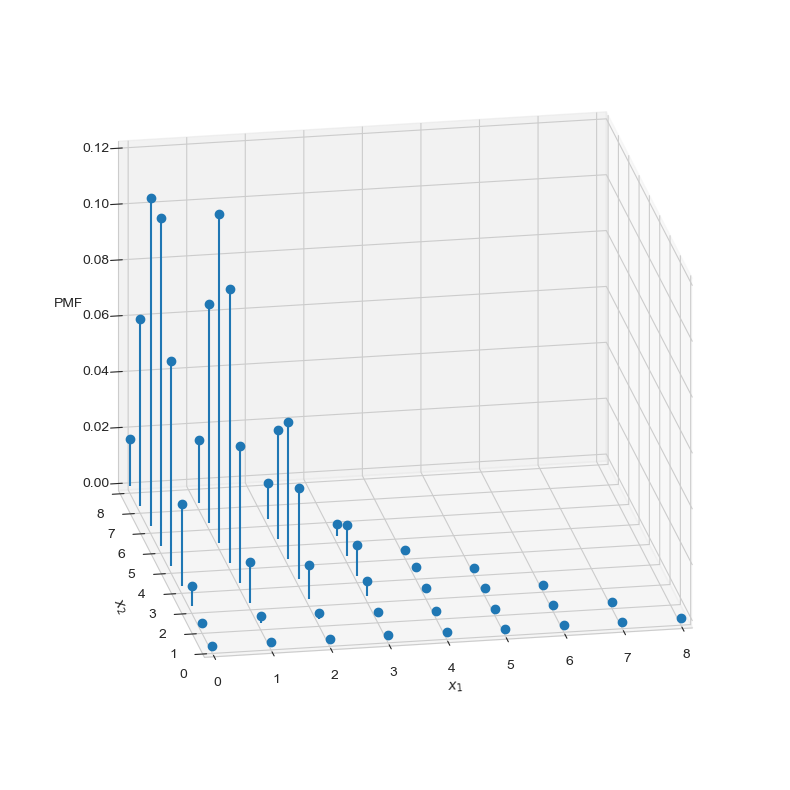

In [3]:
from scipy.stats import multinomial  # 多项式分布
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

num = 8
x1_array = np.arange(num + 1)
x2_array = np.arange(num + 1)

# 生成坐标系
xx1, xx2 = np.meshgrid(x1_array, x2_array)

xx3 = num - xx1 - xx2
xx3 = np.where(xx3 >= 0.0, xx3, np.nan)


def heatmap_sum(data, i_array, j_array, title, vmin, vmax, cmap, annot=False):
    
    fig, ax = plt.subplots(figsize=(10, 10))

    ax = sns.heatmap(data, cmap=cmap,  #'YlGnBu', # YlGnBu
                     cbar_kws={"orientation": "horizontal"},
                     yticklabels=i_array, xticklabels=j_array,
                     ax=ax, annot=annot,
                     linewidths=0.25, linecolor='grey',
                     vmin=vmin, vmax=vmax,
                     fmt='.3f')

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.invert_yaxis()
    ax.set_aspect("equal")
    plt.title(title)
    plt.yticks(rotation=0)


p_array = [0.6, 0.1, 0.3]
p_array = [0.3, 0.4, 0.3]
p_array = [0.1, 0.6, 0.3]

# 计算概率质量函数
PMF_ff = multinomial.pmf(x=np.array(([xx1.ravel(), xx2.ravel(), xx3.ravel()])).T,
                         n=num, p=p_array)

PMF_ff = np.where(PMF_ff > 0.0, PMF_ff, np.nan)

PMF_ff = np.reshape(PMF_ff, xx1.shape)

# flipud 函数翻转 PMF_ff 数组的上下顺序
# df = pd.DataFrame(np.flipud(PMF_ff))
# filepath = 'PMF_ff.xlsx'
# df.to_excel(filepath, index=False)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

ax.scatter3D(xx1.ravel(), xx2.ravel(), xx3.ravel(),
             s=400,
             marker='.',
             c=PMF_ff.ravel(),
             cmap='RdYlBu_r')

# ax.contour(xx1, xx2, PMF_ff, 15, zdir='z', offset=0, cmap='RdYlBu_r')

ax.set_proj_type('ortho')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
# ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
# ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

ax.set_xticks([0, num])
ax.set_yticks([0, num])
ax.set_zticks([0, num])

ax.set_xlim(0, num)
ax.set_ylim(0, num)
ax.set_zlim3d(0, num)
# ax.view_init(azim=20, elev=20)
ax.view_init(azim=-30, elev=20)
ax.view_init(azim=-90, elev=90)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
# ax.set_aspect('equal')
ax.set_box_aspect(aspect=(1, 1, 1))

ax.grid()
plt.show()

title = 'PMF of binomial distribution'
heatmap_sum(PMF_ff, x1_array, x2_array, title, 0, 0.12, 'plasma_r', True)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.stem(xx1.ravel(), xx2.ravel(), PMF_ff.ravel(), basefmt=" ")

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('PMF')

ax.set_xlim((0, 8))
ax.set_ylim((0, 8))
ax.set_zlim((0, 0.12))
# ax.set_zticks([])
# ax.grid(False)
ax.view_init(azim=-100, elev=20)
ax.set_proj_type('ortho')
plt.show()

# test only

# print(multinomial.pmf(x=(5,2,1), n=num, p=p_array))

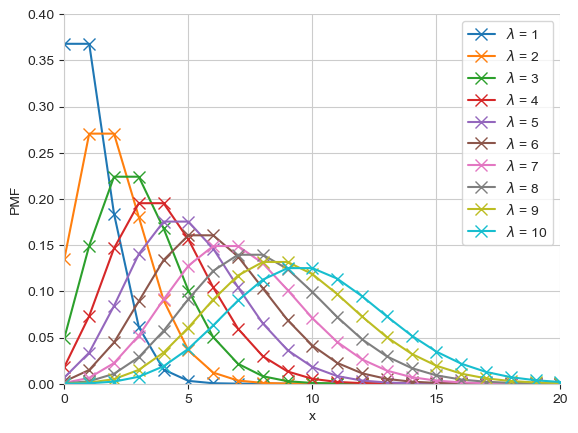

In [5]:
from scipy.stats import poisson  # 泊松分布
import matplotlib.pyplot as plt
import numpy as np

# 生成等差数列
x_array = np.arange(0,20 + 1)

# PMF versus x as lambda varies

fig, ax = plt.subplots()

for lambda_ in [1,2,3,4,5,6,7,8,9,10]:
    plt.plot(x_array, poisson.pmf(x_array, lambda_), 
             marker = 'x',markersize = 8,
             label = '$\lambda$ = ' + str(lambda_))

plt.xlabel('x')
plt.ylabel('PMF')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.xlim(0,x_array.max())
plt.ylim(0,0.4)
plt.xticks([0,5,10,15,20])
plt.legend()

Expectation, Variance, Skewness, Kurtosis:  2.0 2.0 2.1213203435596424 6.5


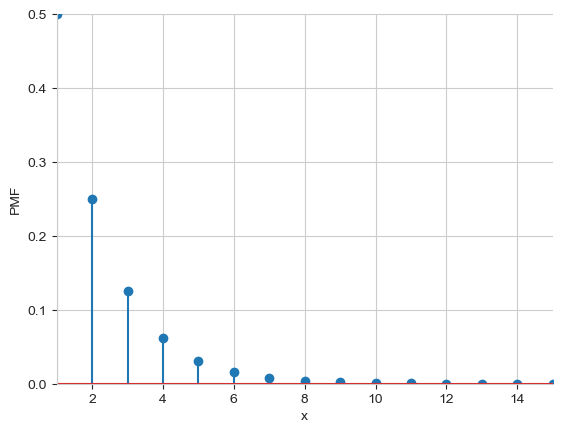

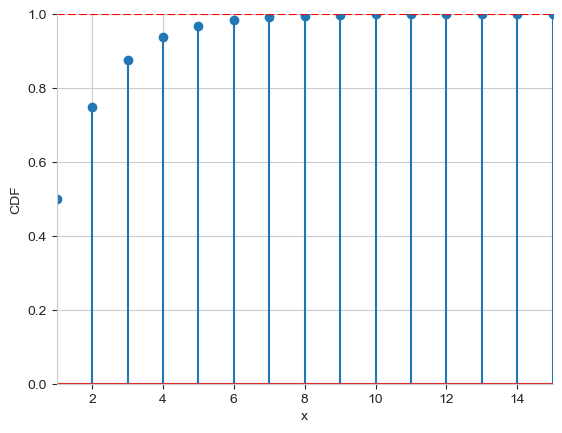

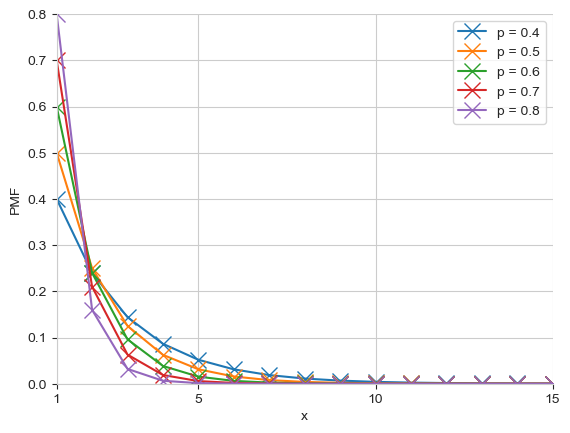

In [6]:
from scipy.stats import geom  # 几何分布
import matplotlib.pyplot as plt
import numpy as np

p = 0.5

# moments = 'mvsk' 表示要计算均值、方差、偏度和峰度
mean,var,skew,kurt = geom.stats(p, moments='mvsk')
print('Expectation, Variance, Skewness, Kurtosis: ', mean, var, skew, kurt)

# 生成等差数列
k_range = np.arange(1,15 + 1)
# PMF versus x
# 概率质量函数
fig, ax = plt.subplots()
# k_range 表示随机变量可能取值的数组
plt.stem(k_range, geom.pmf(k_range, p))

plt.xlabel('x')
plt.ylabel('PMF')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.xlim(1,k_range.max())
plt.ylim(0,p)

# CDF versus x
# 累计分布函数
fig, ax = plt.subplots()

plt.stem(k_range, geom.cdf(k_range, p))
plt.axhline(y = 1, color = 'r', linestyle = '--')

plt.xlabel('x')
plt.ylabel('CDF')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.xlim(1,k_range.max())
plt.ylim(0,1)

# PMF versus x as p varies

k_range = np.arange(1,16)

fig, ax = plt.subplots()

for p in [0.4,0.5,0.6,0.7,0.8]:
    plt.plot(k_range, geom.pmf(k_range, p), 
             marker = 'x',markersize = 12,
             label = 'p = ' + str(p))

plt.xlabel('x')
plt.ylabel('PMF')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.xlim(1,k_range.max())
plt.ylim(0,0.8)
plt.xticks([1,5,10,15])
plt.legend()

([<matplotlib.axis.XTick at 0x2b33d390e80>,
 [Text(0, 0, '0'), Text(5, 0, '5'), Text(10, 0, '10'), Text(15, 0, '15')])

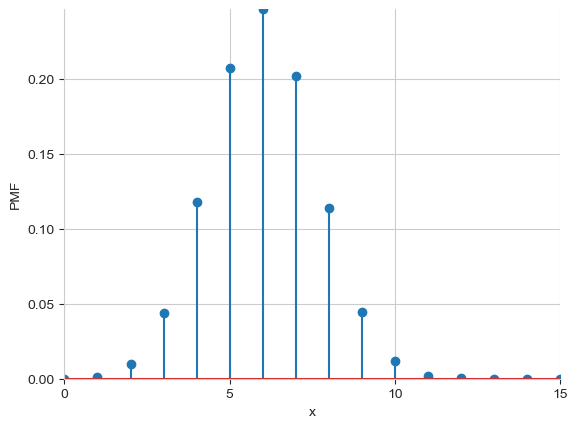

In [7]:
from scipy.stats import hypergeom # 超几何分布
import matplotlib.pyplot as plt
import numpy as np

N = 50 # total number of animals
K = 15 # number of rabbits among N
n = 20 # number of draws without replacement 抽取样本数

# 创建超几何分布对象
hyper_g = hypergeom(N, K, n) 
# 创建数组
x_array = np.arange(np.maximum(0,n + K - N), np.minimum(K,n) + 1)

pmf_rabbits = hyper_g.pmf(x_array)

fig, ax = plt.subplots()

plt.stem(x_array, pmf_rabbits)

plt.xlabel('x')
plt.ylabel('PMF')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().yaxis.set_ticks_position('left')
plt.gca().xaxis.set_ticks_position('bottom')
plt.xlim(x_array.min(),x_array.max())
plt.ylim(0,pmf_rabbits.max())
plt.xticks([0,5,10,15])

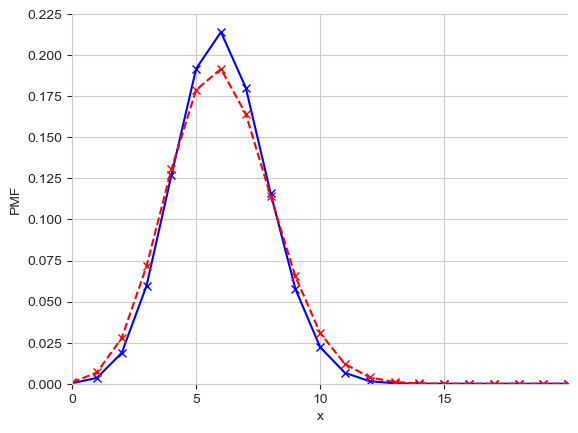

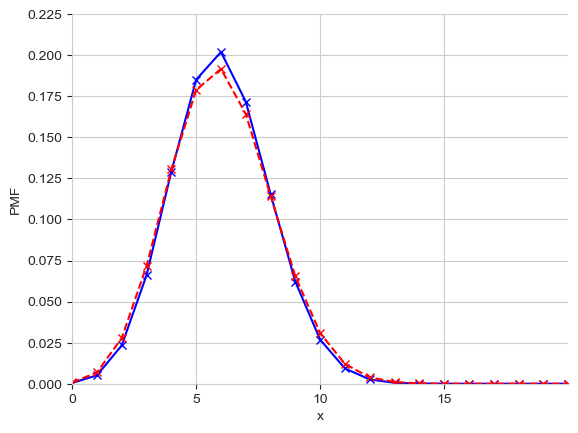

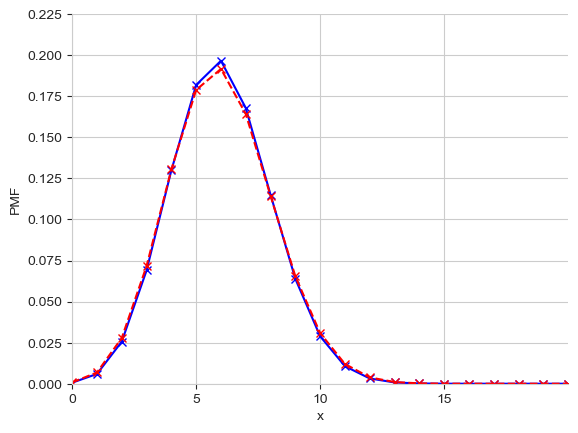

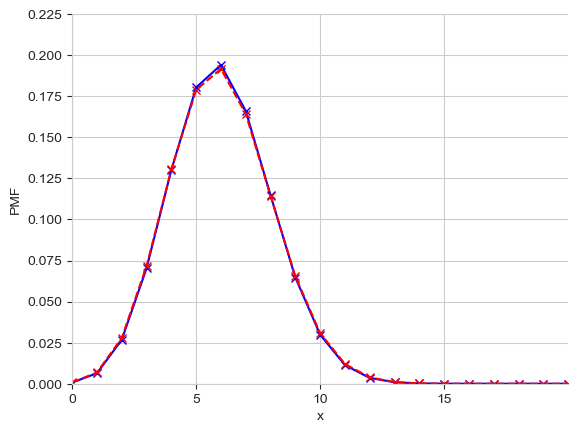

In [8]:
from scipy.stats import hypergeom, binom 
import matplotlib.pyplot as plt
import numpy as np

p = 0.3  # percentage of rabbits in the population

# N: total number of animals
for N in [100,200,400,800]:
    
    K = N*p  # number of rabbits among N
    n = 20   # number of draws without replacement 抽取次数
    
    # 创建超几何分布对象
    hyper_g = hypergeom(N, K, n) 
    # 创建数列
    x_array = np.arange(np.maximum(0,n + K - N), np.minimum(K,n) + 1)
    
    # 计算概率质量函数
    pmf_binom   = binom.pmf(x_array, n, p)
    
    pmf_hyper_g = hyper_g.pmf(x_array)
    
    fig, ax = plt.subplots()
    
    plt.plot(x_array, pmf_hyper_g, '-bx')
    plt.plot(x_array, pmf_binom, '--rx')
    
    plt.xlabel('x')
    plt.ylabel('PMF')
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().yaxis.set_ticks_position('left')
    plt.gca().xaxis.set_ticks_position('bottom')
    plt.xlim(x_array.min(),x_array.max())
    plt.ylim(0,0.225)
    plt.xticks([0,5,10,15])